<a href="https://colab.research.google.com/github/AizazKhan19/Neural-Network-Basics/blob/main/Fashion_MNIST_dataset_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing necessary Libraries**

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


The **Fashion MNIST** dataset is a collection of grayscale 28x28 pixel clothing images. Each image is associated with a label. from 0 to 9.

**This dataset is available directly in the tf.keras.datasets API you load it like this:**   

In [2]:
# Load the Fashion MNIST dataset
dataset=tf.keras.datasets.fashion_mnist

Calling **load_data()** on this object will give you two tuples with two lists each. These will be the training and testing values for the graphics that contain the clothing items and their labels.

In [7]:
# Load the training and test split of the Fashion MNIST
(training_images,training_labels), (test_images, test_labels)= dataset.load_data()

What do these values look like? You can print a training image (both as an image and a numpy array), and a training label to see. Experiment with different indices in the array. For example, also take a look at index `42`. That's a different boot than the one at index `0`.


Label: 9

 Pixel Array:

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187  26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237 255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234 238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3   0  

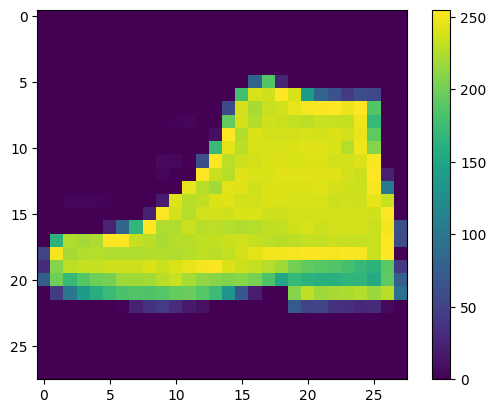

In [5]:
# you can put index value between 0 to 59999
index=42

# set numbers of characters per row when printing
np.set_printoptions(linewidth=320)

# print the label and image
print(f'Label: {training_labels[index]}')
print(f'\n Pixel Array:\n\n{training_images[index]}\n\n')

# visualize the image using the default colormap (viridis)
plt.imshow(training_images[index])
plt.colorbar()
plt.show()

You'll notice that all of the values in the number are between 0 and 255. If you are training a neural network especially in image processing, for various reasons it will usually learn better if you scale all values to between 0 and 1. It's a process called normalization and fortunately in Python, it's easy to normalize an array without looping. You do it like this:



In [8]:
# Normalize the pixel values of the train and test images

training_images = training_images/255.0
test_images = test_images/255.0

In [10]:
# Build the Classification model

model= tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dense(10, activation= 'softmax')
])

Sequential: That defines a sequence of layers in the neural network.

Flatten: Remember earlier where our images were a 28x28 pixel matrix when you printed them out? Flatten just takes that square and turns it into a 1-dimensional array.

Dense: Adds a layer of neurons

Each layer of neurons needs an activation function to tell them what to do. There are a lot of options, but just use these for now:

ReLU effectively means:

if x > 0:
  return x

else:
  return 0
In other words, it only passes values greater than 0 to the next layer in the network.

Softmax takes a list of values and scales these so the sum of all elements will be equal to 1. When applied to model outputs, you can think of the scaled values as the probability for that class. For example, in your classification model which has 10 units in the output dense layer, having the highest value at index = 4 means that the model is most confident that the input clothing image is a coat. If it is at index = 5, then it is a sandal, and so forth. See the short code block below which demonstrates these concepts.

In [11]:
# Declare sample inputs and convert to a tensor

inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function::{ inputs.numpy()}')

# feed the inputs to a softmax activation function

outputs= tf.keras.activations.softmax(inputs)
print(f'output of softmax function : {outputs.numpy()}')


# get the sum of all values after the softmax

sum = tf.reduce_sum(outputs)
print(f' sume of outputs: {sum}')

# get the index with highest values

prediction = np.argmax(outputs)
print(f' class with highest probability : {prediction}')

input to softmax function::[[1. 3. 4. 2.]]
output of softmax function : [[0.0320586  0.23688282 0.64391426 0.08714432]]
 sume of outputs: 1.0
 class with highest probability : 2


In [12]:
Now compiling model and train it

SyntaxError: invalid syntax (ipython-input-3370634208.py, line 1)

In [14]:
model.compile(optimizer= tf.optimizers.Adam(),
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7809 - loss: 0.6357
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8602 - loss: 0.3873
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8728 - loss: 0.3464
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8841 - loss: 0.3178
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8895 - loss: 0.2984


now the model is trained with and accuray of 0.8895 or 88 % accuracy. so now its time to feed the trainded model with unseen data to check how well it performs on unseen data.
For testing, we can call model.evaluate() functions with this test dataset as inputs and it will report back the loss and accuracy of the model.

In [15]:
# Evaluate the model on unseen data

model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8749 - loss: 0.3471


[0.3466302752494812, 0.8751999735832214]

the accuray of model on unseen data is 0.875 or 88%